In [71]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [72]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [73]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [74]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [75]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables

['measurement', 'station']

In [76]:
# View all of the classes that automap found
# equivalent of writing the classes by hand
Measurement = Base.classes.measurement
Station = Base.classes.station  

In [77]:
# Save references to each table

In [78]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [79]:
# Find the most recent date in the data set.
# session.query(Dow.date).order_by(Dow.date).first()
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [90]:
# date from recent_date 2017-8-23 until 2016-8-23
precips = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= dt.datetime(2016, 8, 23)).all()
precipitation = []
date = []

for precip in precips:
    precipitation.append(precip[0])
    date.append(precip[1])

# print(precipitation, date)
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_date_df = pd.DataFrame(list(zip(date, precipitation)), columns=["Dates", "Precipitation"])
# Sort the dataframe by date
precip_date_df = precip_date_df.sort_values("Dates").dropna()
precip_date_df


,Dates,Precipitation
0,2016-08-24,0.08
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
1875,2016-08-24,1.45
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


In [47]:
x_labels = ["2016-08-23", "2016-10-01", "2016-11-09", "2016-12-19", "2017-01-28", "2017-03-09", "2017-04-18", "2017-05-31", "2017-07-01"]
x_labels

['2016-08-23',
 '2016-10-01',
 '2016-11-09',
 '2016-12-19',
 '2017-01-28',
 '2017-03-09',
 '2017-04-18',
 '2017-05-31',
 '2017-07-01']

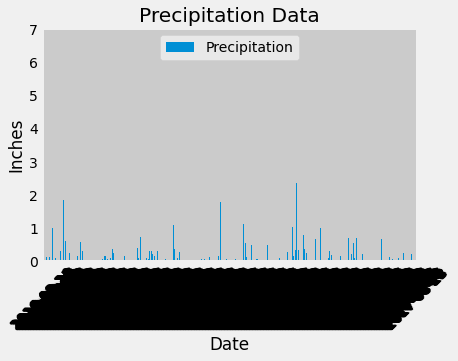

In [92]:
# Use DataFrame.plot() in order to create a bar chart of the data
precip_date_df.plot(x="Dates", y="Precipitation", kind="bar", rot=45)

# Set a title for the chart
plt.title("Precipitation Data")
plt.xlabel("Date")
plt.ylabel("Inches")

# Cannot figure out how to only show a subset of xlabels so it looks ugly 
plt.show()

In [83]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_date_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [109]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()


[(9,)]

In [94]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# query the stations and number of times they appear, then group by station and desc order by the counts
stations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [99]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature. (tobs column)
active_station = stations[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == active_station).all()

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

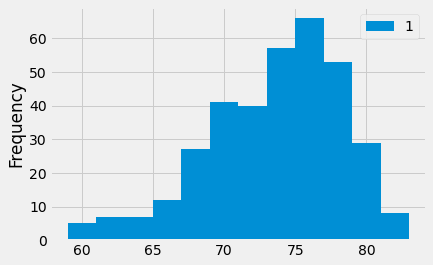

In [108]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# date from recent_date 2017-8-23 until 2016-8-23
temp_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= "2016-08-23")\
    .filter(Measurement.station == active_station).all()

# make df
temp_df = pd.DataFrame(temp_data)

# plot histogram
temp_df.plot.hist(bins=12)

# Close session

In [107]:
# Close Session
session.close()